<a href="https://colab.research.google.com/github/juan-medinaf/Datathon-1_CHL5230_Group4/blob/main/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datathon #1 CHL5230
Group 4
Nitya Kuruvila,Yan Yi Li, Juan Medina


# **Dataset 1 - Canada**

Upload dataset

In [3]:
#load modul
import io
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

from google.colab import files
imported=files.upload()
data_canada = pd.read_csv(io.BytesIO(imported['CHL5230-F23-Datathon #1-Dataset1.csv']))

Saving CHL5230-F23-Datathon #1-Dataset1.csv to CHL5230-F23-Datathon #1-Dataset1.csv


Cleaning data and checking for outliers

In [4]:
le = LabelEncoder()
data_canada['Gender'] = le.fit_transform(data_canada['Gender'])
data_canada['Obesity'] = ''

for index, row in data_canada.iterrows():
  if row['BMI']>=30:
    data_canada['Obesity'].values[index] = 'Obese'

  else:
     data_canada['Obesity'].values[index]= 'Non-obese'

print(data_canada.isnull().sum())
print(data_canada.describe())

data_canada

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
Obesity                0
dtype: int64
                Age        Gender  Calorie_Intake  Sugar_Intake  \
count  23535.000000  23535.000000    23535.000000  23535.000000   
mean      48.532993      0.367070     2495.845634     64.824559   
std       17.872736      0.482016      577.798752     32.004657   
min       18.000000      0.000000     1500.000000     10.000000   
25%       33.000000      0.000000     1991.000000     37.000000   
50%       48.000000      0.000000     2495.000000     65.000000   
75%       64.000000      1.000000     2994.000000     93.000000   
max       79.000000      1.000000     3499.000000    119.000000   

       Physical_Activity  Fast_Food_Frequency   Screen_Time        Height  \
count       23535.000000       

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,Obesity
0,56,0,3091,90,160,4,1,1.569070,81.199394,32.981343,Obese
1,69,0,2090,106,27,0,9,1.629449,74.273566,27.973877,Non-obese
2,46,1,2938,11,45,2,3,1.637726,71.453466,26.640417,Non-obese
3,32,0,3022,48,112,1,8,1.514198,98.163045,42.813720,Obese
4,60,0,2350,83,115,0,7,1.410559,57.323914,28.810685,Non-obese
...,...,...,...,...,...,...,...,...,...,...,...
23530,51,0,2858,65,37,1,9,1.774514,56.917788,18.075460,Non-obese
23531,20,0,2573,27,27,1,1,1.677173,57.277270,20.362283,Non-obese
23532,26,0,2246,37,44,0,3,1.661042,80.314959,29.109537,Non-obese
23533,22,1,1588,24,101,4,7,1.577156,43.365424,17.433880,Non-obese


Training & Test sets and Scaling

In [5]:
X = data_canada[['Age', 'Gender', 'Calorie_Intake',	'Physical_Activity', 'Sugar_Intake', 'Screen_Time', 'Height',	'Weight']]
y = data_canada['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Determine best K-value

Text(0, 0.5, 'Accuracy score')

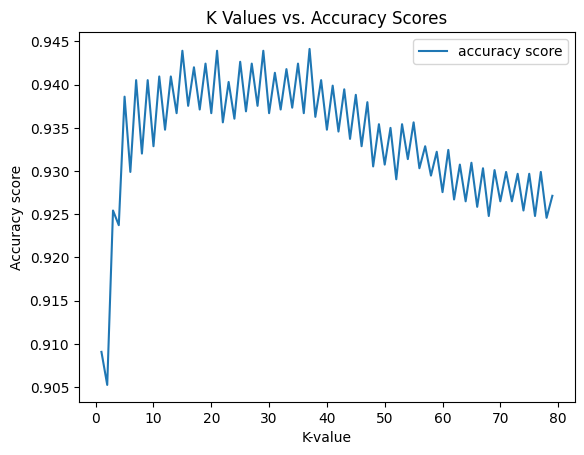

In [8]:
k_vals=[]
ac_scores=[]
for k in range(1,80):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  k_vals.append(k)
  ac_scores.append(accuracy_score(y_test,y_pred))

k_vals=np.array(k_vals)
ac_scores=np.array(ac_scores)
accuracy_k= pd.DataFrame(k_vals,columns=['k'])
accuracy_k['accuracy score']=ac_scores
accuracy_k.plot.line(x='k',y='accuracy score', title='K Values vs. Accuracy Scores')
plt.xlabel('K-value')
plt.ylabel('Accuracy score')

Model & Evaluation

In [9]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)

[[3427   36]
 [ 235 1009]]
              precision    recall  f1-score   support

   Non-obese       0.94      0.99      0.96      3463
       Obese       0.97      0.81      0.88      1244

    accuracy                           0.94      4707
   macro avg       0.95      0.90      0.92      4707
weighted avg       0.94      0.94      0.94      4707



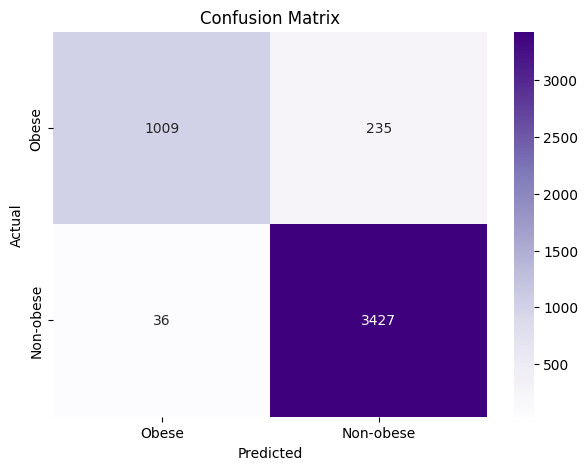

In [10]:
classes = data_canada['Obesity'].unique()

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Exploration of Specific Atributes

In [11]:
X_original_canada = data_canada[['Age', 'Gender', 'Calorie_Intake',	'Physical_Activity', 'Sugar_Intake', 'Fast_Food_Frequency', 'Screen_Time', 'Height',	'Weight']]
attributes_to_check_canada=['Age', 'Gender', 'Calorie_Intake',	'Physical_Activity', 'Sugar_Intake', 'Screen_Time', 'Height',	'Weight']

Define function for analysis

In [12]:
def analysis_other_features(X_original, y,attributes_to_check, y_test_original,y_pred_original):
  for column in X_original:
    if column in attributes_to_check:
      X_column= X_original
      X_column= X_column.drop(column,axis=1)
      X_train_column, X_test_column, y_train_column, y_test_column = train_test_split(X_column, y, test_size=0.2, random_state=42)
      scaler = StandardScaler()
      X_train_column = scaler.fit_transform(X_train_column)
      X_test_column = scaler.transform(X_test_column)
      k_vals_column=[]
      ac_scores_column=[]
      for k in range(1,100):
        knn_column = KNeighborsClassifier(n_neighbors=k)
        knn_column.fit(X_train_column, y_train_column)
        y_pred_column = knn_column.predict(X_test_column)
        k_vals_column.append(k)
        ac_scores_column.append(accuracy_score(y_test_column,y_pred_column))
      k_vals_column=np.array(k_vals_column)
      ac_scores_column=np.array(ac_scores_column)
      accuracy_k_column= pd.DataFrame(k_vals_column,columns=['k'])
      accuracy_k_column['accuracy score']=ac_scores_column
      print('Analysis when dropping', column)
      accuracy_k_column.plot.line(x='k',y='accuracy score', title='K Values vs. Accuracy Scores when dropping '+column)
      accuracy_k_column= accuracy_k_column.sort_values(by='accuracy score',ascending=False)
      print(accuracy_k_column)
      print('Hence, when dropping ',column,' the optimal k-value is',int(accuracy_k_column.iloc[0][0]),', which represents an accuracy score of',accuracy_k_column.iloc[0][1],'\n','and a drop in the accuracy score from the model with all features of', accuracy_score(y_test_original,y_pred_original)- accuracy_k_column.iloc[0][1], '(Note that if negative sign then accuracy score increased)')

Apply function to features in the Canadian dataset

Analysis when dropping Age
     k  accuracy score
20  21        0.946888
12  13        0.945613
14  15        0.945613
22  23        0.945188
16  17        0.944976
..  ..             ...
95  96        0.918207
93  94        0.917782
97  98        0.917570
0    1        0.915233
1    2        0.902486

[99 rows x 2 columns]
Hence, when dropping  Age  the optimal k-value is 21 , which represents an accuracy score of 0.9468876141916295 
 and a drop in the accuracy score from the model with all features of -0.004461440407903083 (Note that if negative sign then accuracy score increased)
Analysis when dropping Gender
     k  accuracy score
12  13        0.944338
10  11        0.943701
16  17        0.942214
20  21        0.941576
14  15        0.941364
..  ..             ...
95  96        0.920756
3    4        0.920756
97  98        0.920544
0    1        0.901636
1    2        0.896750

[99 rows x 2 columns]
Hence, when dropping  Gender  the optimal k-value is 13 , which represents an acc

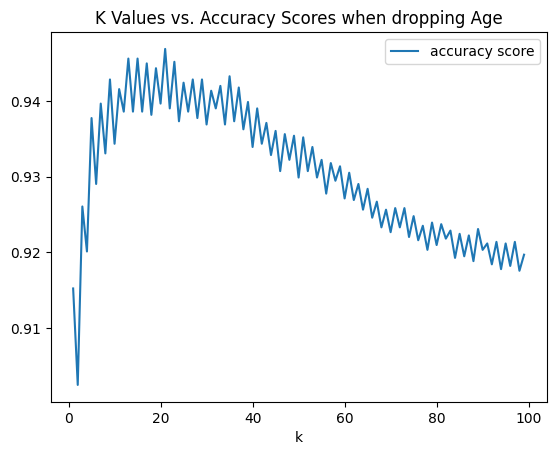

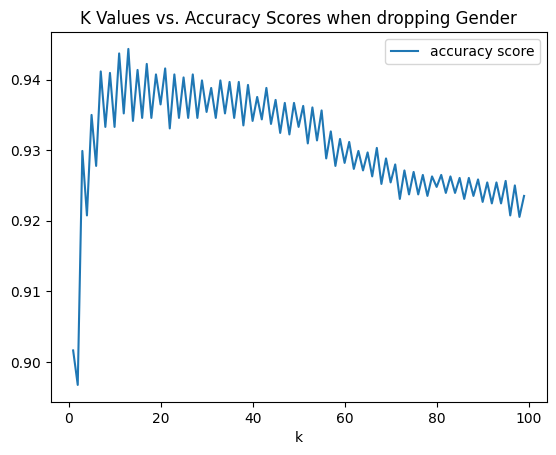

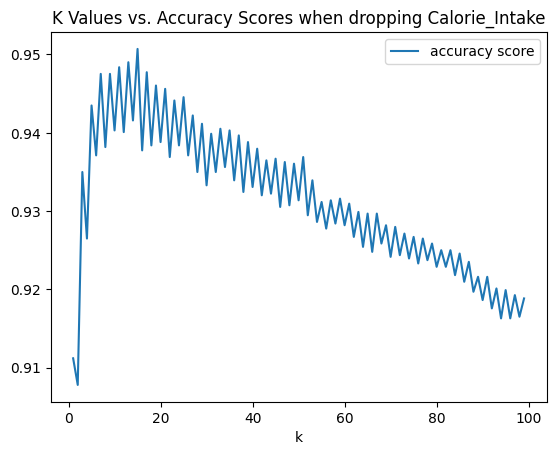

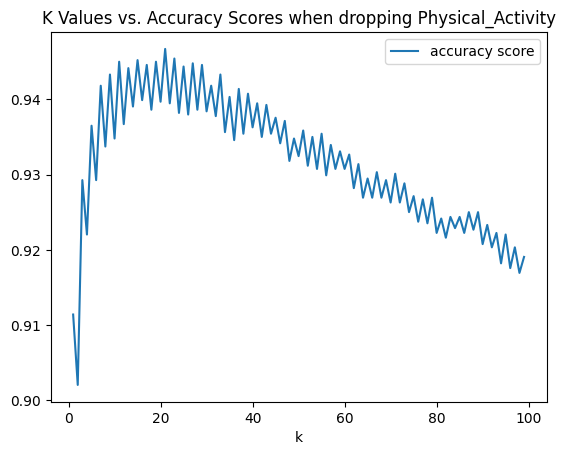

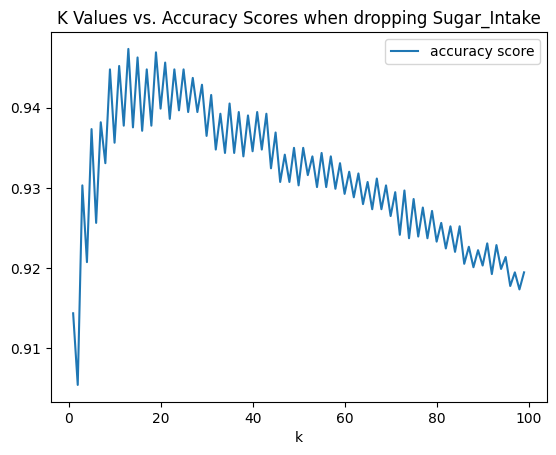

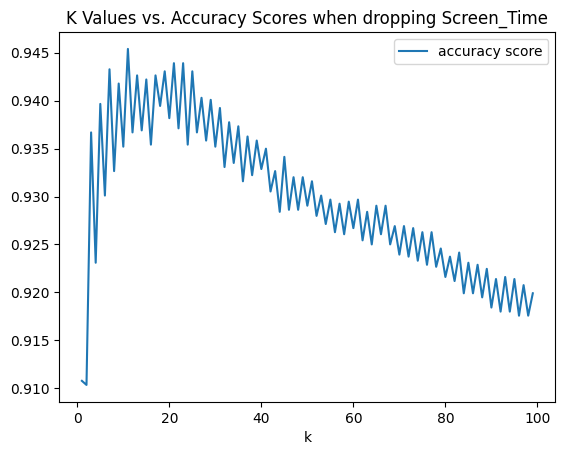

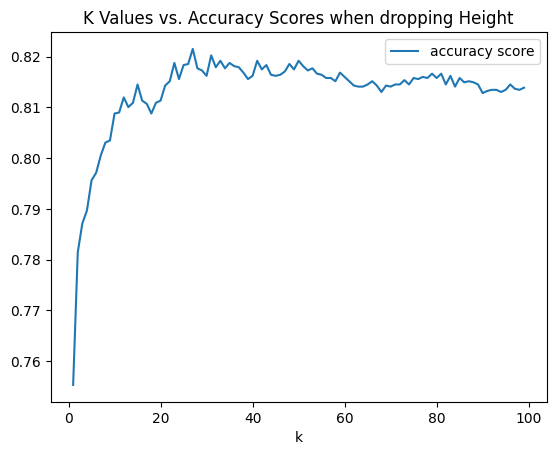

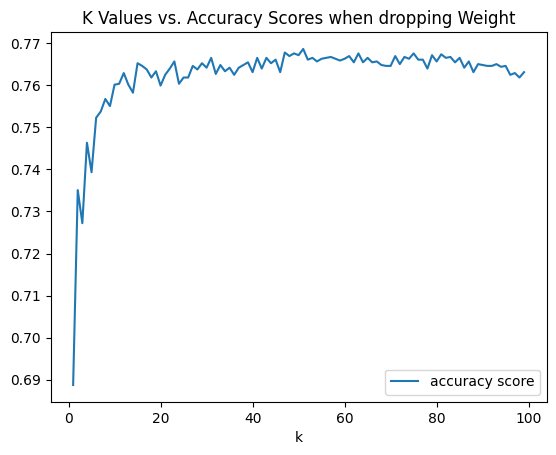

In [13]:
analysis_other_features(X_original_canada,y, attributes_to_check_canada,y_test,y_pred)

# **Dataset 2 - Ethiopia**

In [1]:
import pandas as pd
import numpy as np
import io

In [6]:
from google.colab import files
imported=files.upload()
data_ethiopia = pd.read_csv(io.BytesIO(imported['CHL5230-F23-Datathon#1-Dataset2.csv']))
data_ethiopia

Saving CHL5230-F23-Datathon#1-Dataset2.csv to CHL5230-F23-Datathon#1-Dataset2.csv


,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,24,1,6,1,3,1,2,2,3,3,2,3
1461,53,1,6,2,2,1,3,4,2,3,1,3
1462,62,1,6,8,1,1,4,3,3,2,2,3
1463,29,1,6,1,2,3,2,4,1,1,3,3


Cleaning data & identifying outliers

In [7]:
data_ethiopia['Severity'] = data_ethiopia['Severity'].map({0: "Low",1:"Medium",2:"High",3:"Healthy"})
le = LabelEncoder()
data_ethiopia['Gender'] = le.fit_transform(data_ethiopia['Gender'])  # Male: 1, Female: 0

print(data_ethiopia.isnull().sum())
print(data_ethiopia.describe())

data_ethiopia

Age                  0
Gender               0
Air Pollution        0
Alcohol Usage        0
Genetic Risk         0
Lung Disease         0
Obesity              0
Smoking              0
Passive Smoker       0
Chest Pain           0
Coughing of Blood    0
Severity             0
dtype: int64
               Age       Gender  Air Pollution  Alcohol Usage  Genetic Risk  \
count  1465.000000  1465.000000    1465.000000    1465.000000   1465.000000   
mean     37.238225     0.404778       3.958362       4.258020      3.892150   
std      12.078575     0.491017       2.033272       2.564265      2.134635   
min      14.000000     0.000000       1.000000       1.000000      1.000000   
25%      28.000000     0.000000       2.000000       2.000000      2.000000   
50%      36.000000     0.000000       4.000000       4.000000      3.000000   
75%      45.000000     1.000000       6.000000       7.000000      6.000000   
max      73.000000     1.000000       8.000000       8.000000      7.000000   


,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,0,2,4,3,2,4,3,2,2,4,Low
1,17,0,3,1,4,2,2,2,4,2,3,Medium
2,35,0,4,5,5,4,7,2,3,4,8,High
3,37,0,7,7,6,7,7,7,7,7,8,High
4,46,0,6,8,7,6,7,8,7,7,9,High
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,24,0,6,1,3,1,2,2,3,3,2,Healthy
1461,53,0,6,2,2,1,3,4,2,3,1,Healthy
1462,62,0,6,8,1,1,4,3,3,2,2,Healthy
1463,29,0,6,1,2,3,2,4,1,1,3,Healthy


**Case 1: All features vs. Lung Cancer Severity**

Training & Test sets and Scaling

In [14]:
X_ethiopia = data_ethiopia[['Age', 'Gender', 'Air Pollution', 'Alcohol Usage','Genetic Risk','Lung Disease','Obesity','Smoking','Chest Pain','Coughing of Blood']]
y_ethiopia = data_ethiopia['Severity']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_ethiopia, y_ethiopia, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

Determine best K-value

<Axes: title={'center': 'K Values vs. Accuracy Scores'}, xlabel='k'>

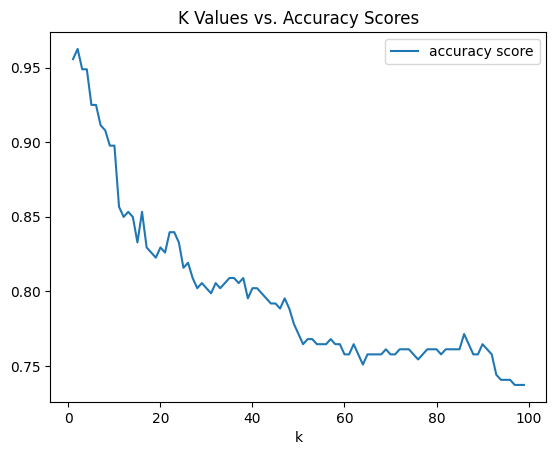

In [15]:
k_vals1=[]
ac_scores1=[]
for k in range(1,100):
  knn1= KNeighborsClassifier(n_neighbors=k)
  knn1.fit(X_train1, y_train1)
  y_pred1 = knn1.predict(X_test1)
  k_vals1.append(k)
  ac_scores1.append(accuracy_score(y_test1,y_pred1))

k_vals1=np.array(k_vals1)
ac_scores1=np.array(ac_scores1)
accuracy_k1= pd.DataFrame(k_vals1,columns=['k'])
accuracy_k1['accuracy score']=ac_scores1
accuracy_k1.plot.line(x='k',y='accuracy score', title='K Values vs. Accuracy Scores')

Model & Evaluation (k=2)

In [16]:
knn1 = KNeighborsClassifier(n_neighbors=2)
knn1.fit(X_train1, y_train1)
y_pred1 = knn1.predict(X_test1)

print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1,y_pred1))

[[92  0  2  4]
 [ 0 80  0  0]
 [ 5  0 52  0]
 [ 0  0  0 58]]
              precision    recall  f1-score   support

     Healthy       0.95      0.94      0.94        98
        High       1.00      1.00      1.00        80
         Low       0.96      0.91      0.94        57
      Medium       0.94      1.00      0.97        58

    accuracy                           0.96       293
   macro avg       0.96      0.96      0.96       293
weighted avg       0.96      0.96      0.96       293



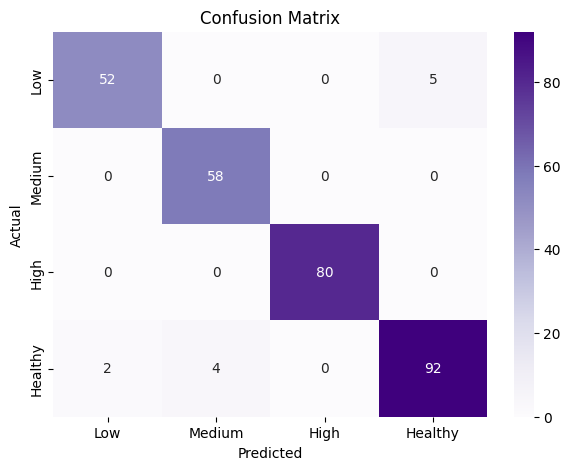

In [17]:
# Get unique classes
classes = data_ethiopia['Severity'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test1, y_pred1, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Case 2: All features minus obesity vs. Severity**

Training & Test sets and Scaling

In [18]:
X_eth = data_ethiopia[['Age', 'Gender', 'Air Pollution', 'Alcohol Usage','Genetic Risk','Lung Disease','Smoking','Chest Pain','Coughing of Blood']]
y_eth = data_ethiopia['Severity']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_eth, y_eth, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

Determine best K-value

Text(0, 0.5, 'Accuracy score')

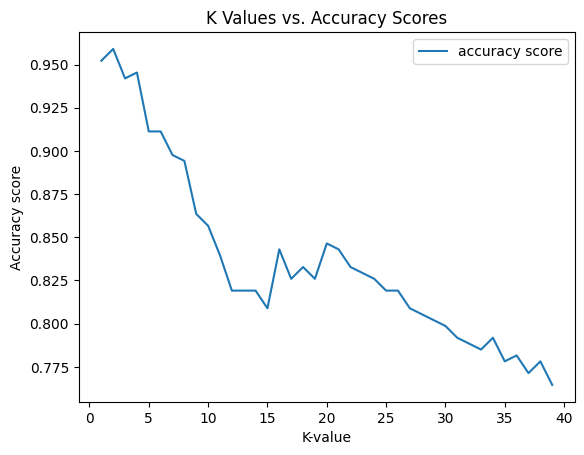

In [19]:
k_vals2=[]
ac_scores2=[]
for k in range(1,40):
  knn2 = KNeighborsClassifier(n_neighbors=k)
  knn2.fit(X_train2, y_train2)
  y_pred2 = knn2.predict(X_test2)
  k_vals2.append(k)
  ac_scores2.append(accuracy_score(y_test2,y_pred2))

k_vals2=np.array(k_vals2)
ac_scores2=np.array(ac_scores2)
accuracy_k2= pd.DataFrame(k_vals2,columns=['k'])
accuracy_k2['accuracy score']=ac_scores2
accuracy_k2.plot.line(x='k',y='accuracy score', title='K Values vs. Accuracy Scores')
plt.xlabel('K-value')
plt.ylabel('Accuracy score')

Model & Evaluation

In [20]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train2, y_train2)
y_pred2 = knn2.predict(X_test2)

print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2,y_pred2))

[[91  0  3  4]
 [ 0 80  0  0]
 [ 5  0 52  0]
 [ 0  0  0 58]]
              precision    recall  f1-score   support

     Healthy       0.95      0.93      0.94        98
        High       1.00      1.00      1.00        80
         Low       0.95      0.91      0.93        57
      Medium       0.94      1.00      0.97        58

    accuracy                           0.96       293
   macro avg       0.96      0.96      0.96       293
weighted avg       0.96      0.96      0.96       293



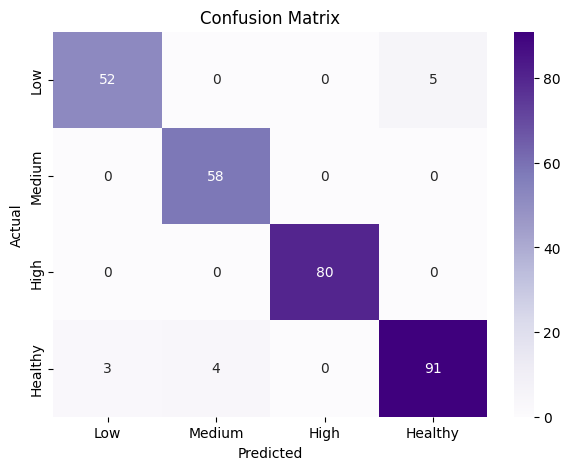

In [21]:
# Get unique classes
classes = data_ethiopia['Severity'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test2, y_pred2, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Case 3: Analysis when dropping other features besides obesity**

In [22]:
X_ethiopia

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Chest Pain,Coughing of Blood
0,33,0,2,4,3,2,4,3,2,4
1,17,0,3,1,4,2,2,2,2,3
2,35,0,4,5,5,4,7,2,4,8
3,37,0,7,7,6,7,7,7,7,8
4,46,0,6,8,7,6,7,8,7,9
...,...,...,...,...,...,...,...,...,...,...
1460,24,0,6,1,3,1,2,2,3,2
1461,53,0,6,2,2,1,3,4,3,1
1462,62,0,6,8,1,1,4,3,2,2
1463,29,0,6,1,2,3,2,4,1,3


In [23]:
attributes_to_check_ethiopia= ['Age','Gender','Alcohol Usage','Chest Pain','Coughing of Blood','Lung Disease']

Analysis when dropping Age
     k  accuracy score
0    1        0.965870
1    2        0.965870
2    3        0.955631
3    4        0.955631
4    5        0.952218
..  ..             ...
76  77        0.730375
77  78        0.730375
81  82        0.730375
97  98        0.723549
98  99        0.723549

[99 rows x 2 columns]
Hence, when dropping  Age  the optimal k-value is 1 , which represents an accuracy score of 0.9658703071672355 
 and a drop in the accuracy score from the model with all features of -0.0034129692832765013 (Note that if negative sign then accuracy score increased)
Analysis when dropping Gender
     k  accuracy score
1    2        0.972696
0    1        0.965870
3    4        0.959044
2    3        0.955631
4    5        0.955631
..  ..             ...
56  57        0.723549
57  58        0.720137
55  56        0.716724
54  55        0.716724
71  72        0.713311

[99 rows x 2 columns]
Hence, when dropping  Gender  the optimal k-value is 2 , which represents an accu

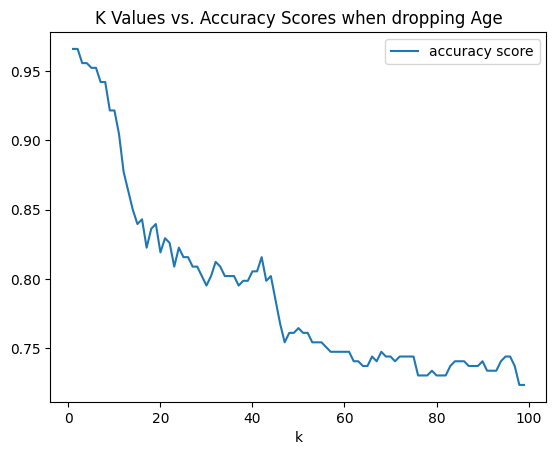

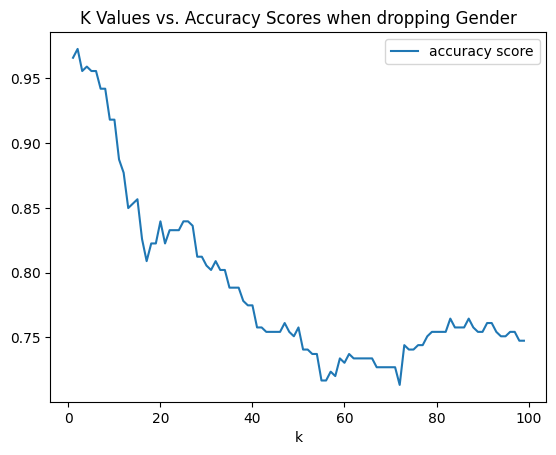

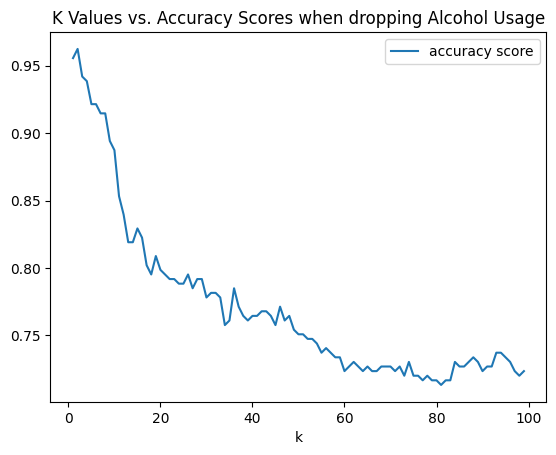

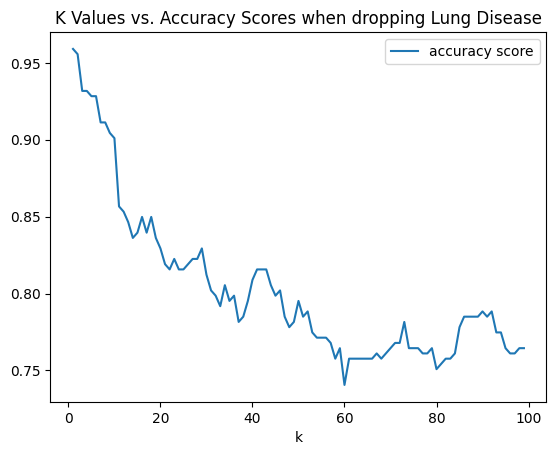

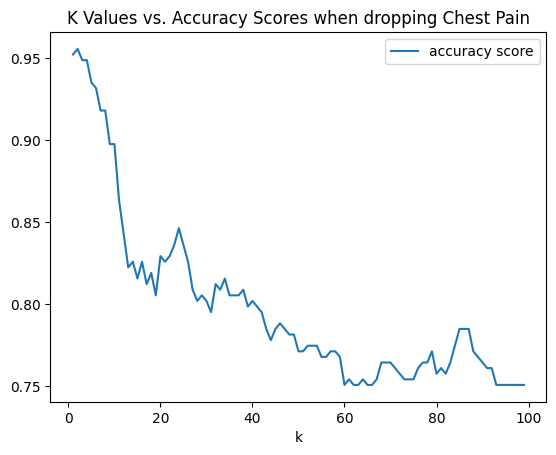

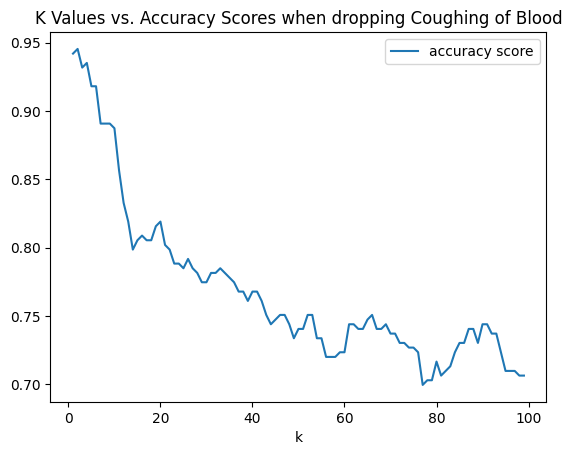

In [24]:
analysis_other_features(X_ethiopia, y_ethiopia,attributes_to_check_ethiopia, y_test1, y_pred1)